In [30]:
import pandas as pd
import seaborn as sns
import math as mth
import numpy as np
import matplotlib.pyplot as plt

In [37]:
df = pd.read_excel('data.xlsx')
df.head()
df.describe()

,Close_ETF,oil,gold,JPM
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.152960,0.001030,0.000663,0.000530
std,12.569790,0.021093,0.011289,0.011017
min,96.419998,-0.116533,-0.065805,-0.048217
25%,112.580002,-0.012461,-0.004816,-0.005538
50%,120.150002,0.001243,0.001030,0.000386
75%,128.687497,0.014278,0.007482,0.006966
max,152.619995,0.087726,0.042199,0.057480


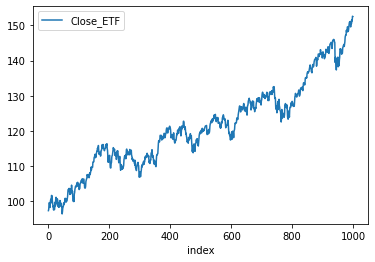

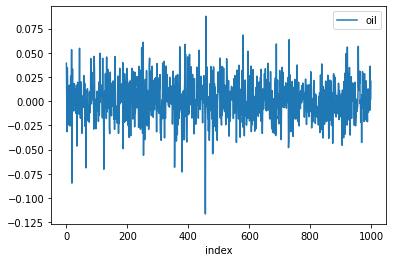

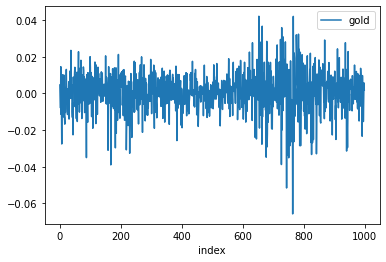

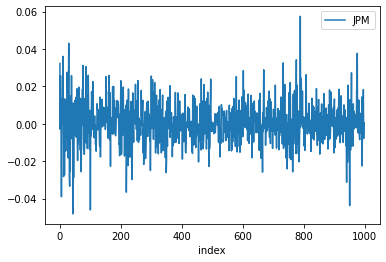

In [29]:
cols = ['Close_ETF','oil','gold','JPM']

for i in cols:
    df.reset_index().plot(x='index',y=i)

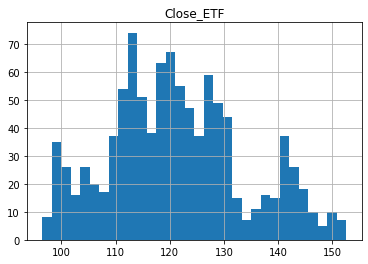

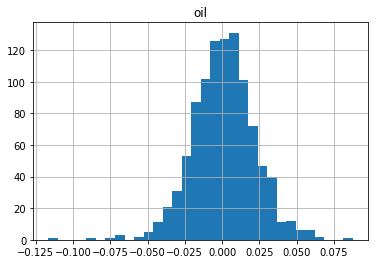

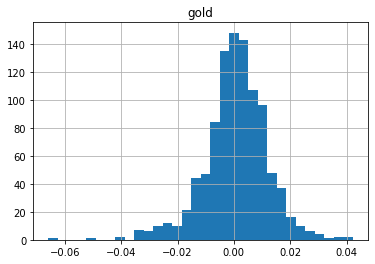

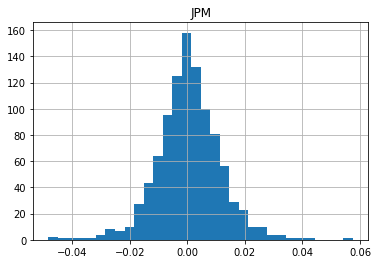

In [6]:
bins = round(np.sqrt(1000))
for i in cols:
    df.hist(i,bins=bins)

# Initial Observations
Close ETF: bimodal \
Oil: Negatively skewed distribution \
Gold: Negatively skewed distribution \
JPM: Most likely normal distribution 

<AxesSubplot:>

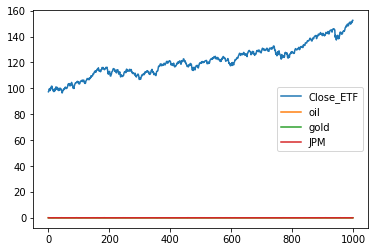

In [7]:
df.plot()

# What distribution does the data follow

## Methods of testing normality
* Probability Plot
* Kurtosis
* Chi-Square Goodness of fit

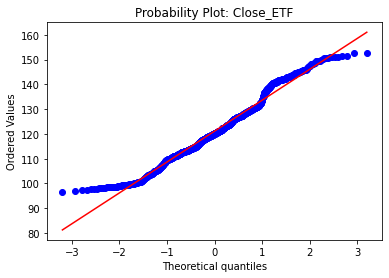

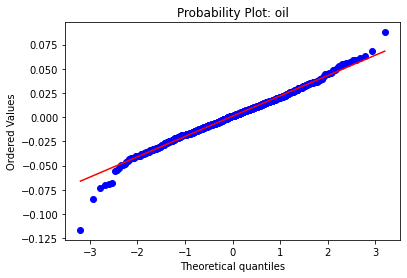

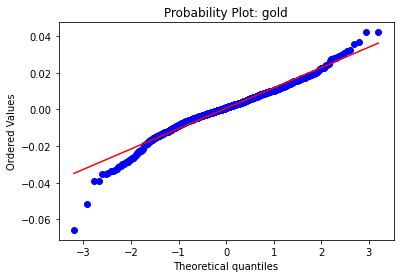

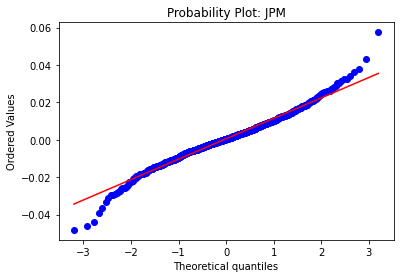

In [8]:
from scipy import stats

def prob_plot(data):
    for i in data.columns:
        stats.probplot(data[i],plot=plt)
        plt.title('Probability Plot: ' + str(i))
        plt.show()
        
prob_plot(df)

# Kurtosis Test
* Close_ETF and Oil results are not normally distributed\
* Gold and JPM are possibly normal

In [9]:
for i in df.columns:
    kurtosis = stats.kurtosis(df[i])
    print(str(i)+' = ' + str(kurtosis))

Close_ETF = -0.4289051554319423
oil = 1.5630302655837172
gold = 2.5575551930517157
JPM = 2.0928717453849695


In [10]:
k2, p = stats.normaltest(df['JPM'])

In [11]:
print(p)

4.4013170216572694e-12


In [12]:
def norm_test(df,sig_level):
    ''' This function will be used to test the normality of a population/sample using the Chi-Squared test. 
    '''
    for i in df.columns:
        print(i)
        k2, p = stats.normaltest(df[i])
        
        if p < sig_level:
            print('p-value = '+ str(p))
            print('The null hypothesis is rejected. ' + str(i) + ' is not normally distributed')
        else: 
            print('We fail to reject the null hypothesis. '+str(i)+' follows a normal distribution.')
        

In [14]:
# Normality Test
norm_test(df,0.05)

Close_ETF
p-value = 1.2734397418438873e-06
The null hypothesis is rejected. Close_ETF is not normally distributed
oil
p-value = 9.993623074366447e-10
The null hypothesis is rejected. oil is not normally distributed
gold
p-value = 1.0827873971023125e-23
The null hypothesis is rejected. gold is not normally distributed
JPM
p-value = 4.4013170216572694e-12
The null hypothesis is rejected. JPM is not normally distributed


Whenever a normality test fails, an important skill to develop is to determine the reason for why the data is not normal. A few common reasons include:

* The underlying distribution is nonnormal.
* Outliers or mixed distributions are present.
* A low discrimination gauge is used.
* Skewness is present in the data.
* you have a large sample size.  

Most likely due to skewness and outliers present.

# Part 4

In [15]:
# Part 1
pop_mean = df.mean()
pop_std = df.std()

# Part 2: Sample into 50 groups of 20 values sequentially
sample = [df.iloc[20*i:20*i+20] for i in range(50)]

# Part 3: Calculate the mean of each sample
sample_mean = pd.DataFrame([np.mean(sample[i]) for i in range(50)])

# Calculate the standard deviation of each sample
sample_std = pd.DataFrame([np.std(sample[i]) for i in range(50)])

In [16]:
pop_std

Close_ETF    12.569790
oil           0.021093
gold          0.011289
JPM           0.011017
dtype: float64

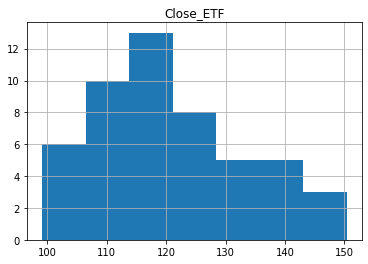

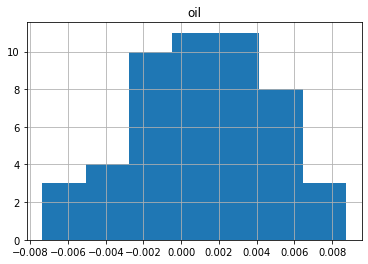

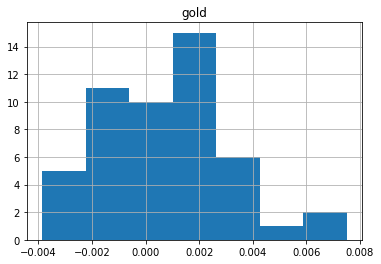

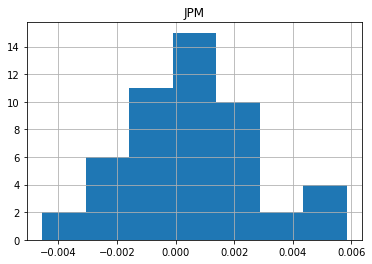

In [36]:
for i in sample_mean.columns:
    sample_mean.hist(i,bins = round(np.sqrt(len(sample_mean))))
    plt.show()

In [26]:
### Part 4 ###

# Expected value of sample mean
mu_xbar = np.mean(sample_mean)
print('The expected value of the sample mean is:')
print(mu_xbar)

# Standard Deviation of the sample mean
std_xbar = np.std(sample_mean)
print('The standard deviation of the sample mean is:')
print(std_xbar)

pop_mean

pop_std/np.sqrt(50)

The expected value of the sample mean is:
Close_ETF    121.152960
oil            0.001030
gold           0.000663
JPM            0.000530
dtype: float64
The standard deviation of the sample mean is:
Close_ETF    12.489176
oil           0.003696
gold          0.002342
JPM           0.002295
dtype: float64


Close_ETF    1.777637
oil          0.002983
gold         0.001597
JPM          0.001558
dtype: float64